<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B20190204_3%5D_PyTorch_Tensor_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Official Document
* https://pytorch.org/docs/stable/index.html

## Code Reference
*  https://github.com/chenyuntc/pytorch-book/blob/master/chapter3-Tensor%E5%92%8Cautograd/Tensor.ipynb


In [1]:
# Let's begin
from __future__ import print_function
import torch  as t
t.__version__

'1.0.0'

In [0]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device('cpu') 

In [0]:
# 设置随机数种子，保证在不同电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

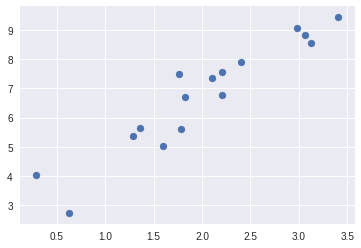

In [4]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

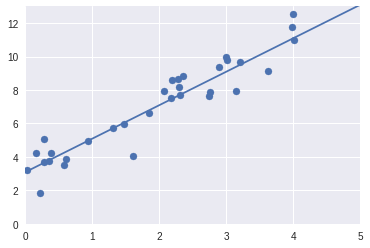

w:  1.9848859310150146 b:  3.0376648902893066


In [23]:
#@title
t.set_default_tensor_type('torch.FloatTensor')

# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr =0.02 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=4)
    
    # forward：计算loss
    w= w.type(t.FloatTensor)
    y_pred = x.mm(w) + b.expand_as(y) # x@W等价于x.mm(w);for python3 only
    
    loss = 0.5 * (y_pred - y) ** 2 # 均方误差
    loss = loss.mean()
    
    # backward：手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:
       
        # 画图
        #'''
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        
        w= w.type(t.LongTensor)
        #w= w.type(t.FloatTensor)
        
        y = x.mm(w)       
        y= y.float()+ b.expand_as(x)
        
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        # '''
        
        
print('w: ', w.item(), 'b: ', b.item())

## Debug
* Expected object of scalar type Long but got scalar type Float for argument #2 'mat2'
*  Expected type torch.FloatTensor but got torch.LongTensor